<a href="https://colab.research.google.com/github/busrasari/INF506-DataAnalysisMethods/blob/main/UE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

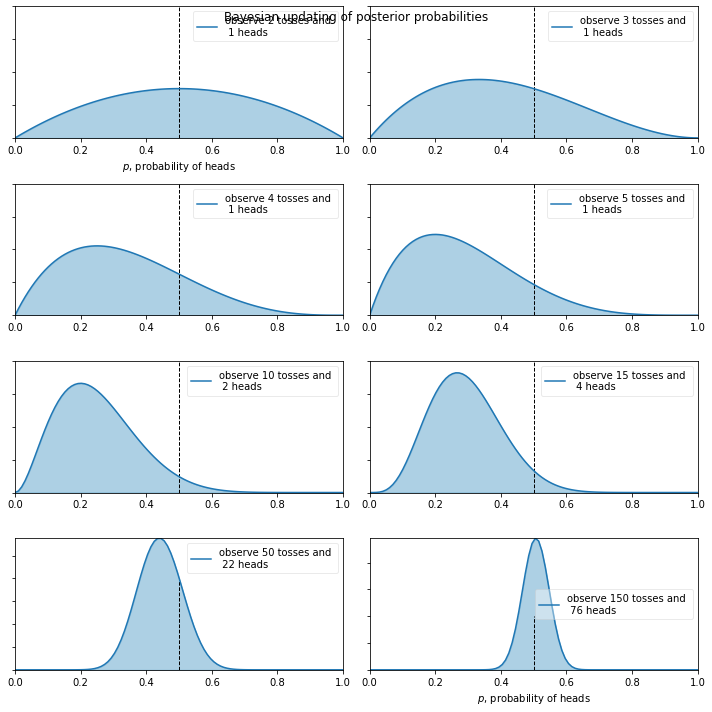

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import math


def B(alpha, beta):
    """a normalizing constant so that the total probability is 1"""
    B= math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)
    return B

def beta_pdf(x, alpha, beta):
    if x.any() < 0 or x.any() > 1:  # no weight outside of [0, 1]
       return 0
    return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)


plt.figure(figsize=(10, 10))

n_trials = [2, 3, 4, 5, 10, 15, 50, 150]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1], random_state=1)
x = np.linspace(0, 1, 100)

for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel('$p$, probability of heads') if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = beta_pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label='observe %d tosses and \n %d heads' % (N, heads))
    plt.fill_between(x, 0, y, color='#348ABD', alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)

plt.suptitle("Bayesian updating of posterior probabilities", fontsize=12)
plt.tight_layout()
plt.show()
